In [7]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data, filters, segmentation, measure, morphology, color

In [2]:
file_path = '/data/file/rice_frame/MVI_1/'
file_num = 1

In [3]:
file_name = file_path+str(file_num)+'.jpg'


In [4]:
file_name

'/data/file/rice_frame/MVI_1/1.jpg'

In [5]:
rice_img = io.imread(file_name)

In [6]:
rice_img.shape

(1080, 1920, 3)

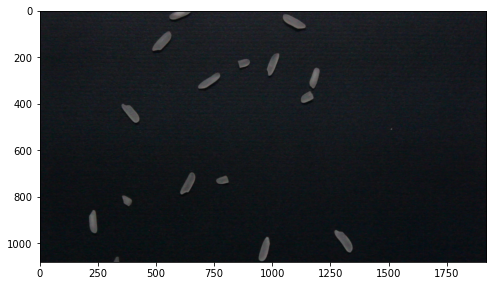

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(rice_img)

In [8]:
from skimage.color import rgb2gray
rice_img = rgb2gray(rice_img)
rice_img.shape

(1080, 1920)

In [9]:
thresh = filters.threshold_otsu(rice_img) # 阈值分割

In [14]:
bw = morphology.closing(rice_img > thresh) # 闭运算
print('thresh:', thresh, ' bw:', bw.size)

thresh: 0.22212563495710785  bw: 2073600


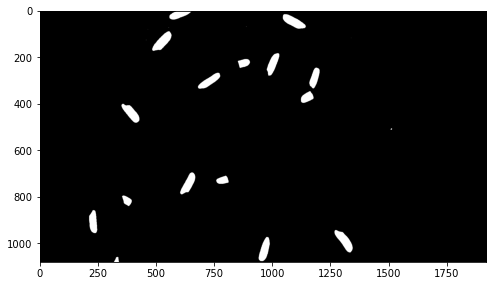

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(bw,plt.cm.gray)

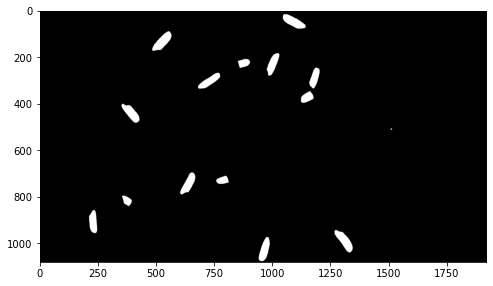

In [15]:
cleared = bw.copy()
cleared = segmentation.clear_border(cleared) # 清除与边界相连的目标物
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(cleared,plt.cm.gray)

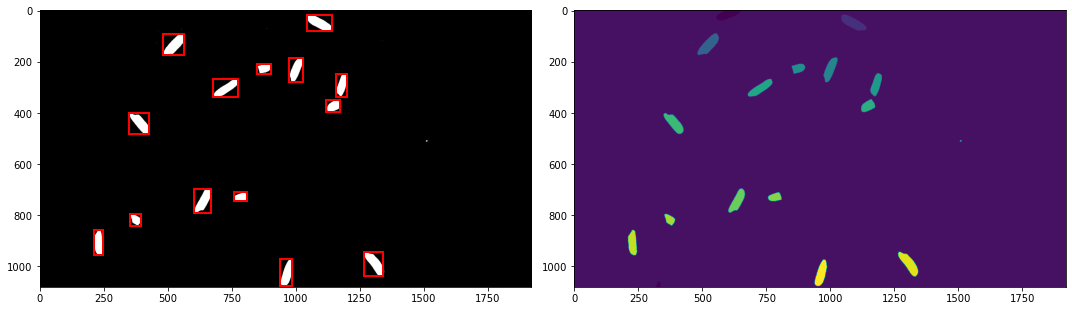

In [61]:
label_image = measure.label(cleared)  # 连通区域的标记
borders = np.logical_xor(bw, cleared)  # 异或
label_image[borders] = -1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(cleared, plt.cm.gray)
ax2.imshow(label_image)
for region in measure.regionprops(label_image):
    if region.area < 100:
        continue
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False,  edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
    
fig.tight_layout()
plt.show()